In [2]:
import sys
from tensorflow import keras
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from ensemble import Ensemble
import tensorflow.keras.backend as K

2022-02-10 17:15:20.593296: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-10 17:15:20.593353: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
with open("./settings/model/config.yaml", 'r') as stream:
        config =yaml.load(stream ,Loader=  yaml.FullLoader)

K.clear_session()
sigma_index_lst = [0,1]
epoch_num = 2
model = Ensemble(mode='test', model_kind='rnn_cnn', sigma_lst=sigma_index_lst,
                     default_n=20, epoch_num=epoch_num, epoch_min=100, epoch_step=50, **config)
model.train_model_outer()


2022-02-10 17:15:30.448612: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-10 17:15:30.448640: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-10 17:15:30.448656: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sky-ubuntu): /proc/driver/nvidia/version does not exist
2022-02-10 17:15:30.448861: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(1869, 1, 4)
Input shape: (1869, 1, 4)
Load weight from ./log/model/


In [4]:
dt = pd.read_csv('./data/test.csv')
print(dt.shape)

dr = pd.read_csv('./data/SonTay.csv')
print(dr.shape)



(1000, 6)
(5000, 6)


In [15]:
Q, H, Q_, H_ =[], [], [], []

for i in range(100): 
    dr.iloc[-5000:].to_csv('./data/SonTay.csv', index = False)
    model.data = model.generate_data_vp()
    q_pred, h_pred = model.prediction_vp()
    Q.append(dt.iloc[i]['Q'])
    H.append(dt.iloc[i]['H'])
    Q_.append(q_pred)
    H_.append(h_pred)
    dr = dr.append(dt.iloc[i], ignore_index = True)
    print(i)
    

/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Q_ssa'] = Q_ssa
/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['H_ssa'] = H_ssa


0


/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Q_ssa'] = Q_ssa
/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['H_ssa'] = H_ssa


1


/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Q_ssa'] = Q_ssa
/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['H_ssa'] = H_ssa


2


/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Q_ssa'] = Q_ssa
/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['H_ssa'] = H_ssa


3


/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Q_ssa'] = Q_ssa
/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['H_ssa'] = H_ssa


4


/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Q_ssa'] = Q_ssa
/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['H_ssa'] = H_ssa


5


/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Q_ssa'] = Q_ssa
/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['H_ssa'] = H_ssa


6


/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Q_ssa'] = Q_ssa
/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['H_ssa'] = H_ssa


7


/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Q_ssa'] = Q_ssa
/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['H_ssa'] = H_ssa


8
9


/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Q_ssa'] = Q_ssa
/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['H_ssa'] = H_ssa


In [16]:
print('q, q_, h, h_')
for i in range(100):
    print(Q[i], Q_[i], H[i], H_[i])

q, q_, h, h_
37327.15 nan 37245.44 nan
37327.15 nan 37250.64 nan
37283.0 nan 37251.18 nan
37346.58 nan 37253.92 nan
37325.69 nan 37300.93 nan
37355.16 nan 37312.57 nan
37411.24 nan 37328.55 nan
37417.07 nan 37391.84 nan
37418.16 nan 37400.0 nan
37420.0 nan 37399.55 nan


IndexError: list index out of range

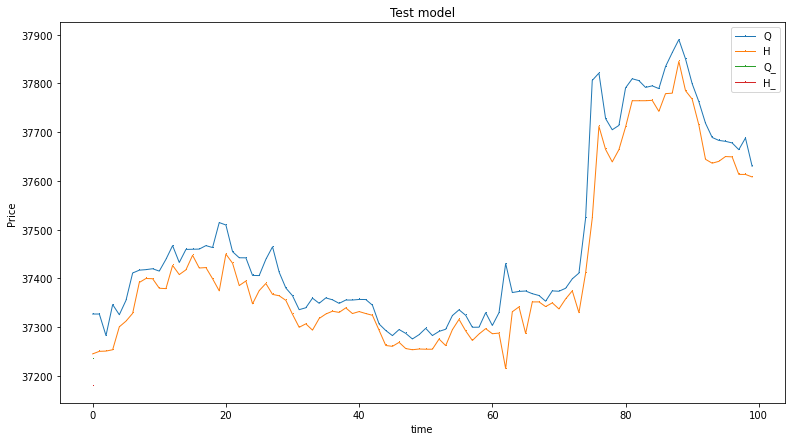

<Figure size 432x288 with 0 Axes>

In [9]:
m, n = 0, 100
plt.subplots(1, figsize=(13, 7))
plt.plot(Q[m:n],marker=',', linewidth='1', label="Q" )
plt.plot(H[m:n],marker=',', linewidth='1', label="H" )
plt.plot(Q_[m:n],marker=',', linewidth='1', label="Q_" )
plt.plot(H_[m:n],marker=',', linewidth='1', label="H_" )




plt.xlabel('time')
plt.ylabel('Price')
plt.title('Test model')
plt.legend()
plt.show()
plt.savefig('./data/test')

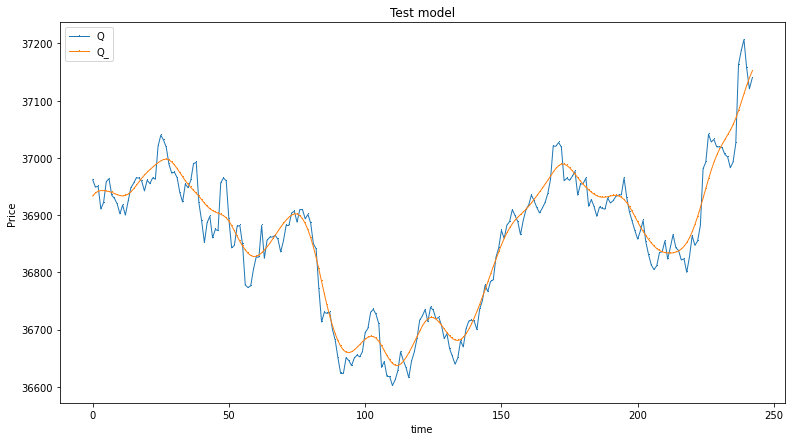

<Figure size 432x288 with 0 Axes>

In [15]:
q_r_e = pd.read_csv('./log/data_analysis/predict_val_0.csv')
m, n = 0, 250
plt.subplots(1, figsize=(13, 7))
plt.plot(q_r_e['real_q'][m:n],marker=',', linewidth='1', label="Q" )
plt.plot(q_r_e['ensemble_q'][m:n],marker=',', linewidth='1', label="Q_" )


plt.xlabel('time')
plt.ylabel('Price')
plt.title('Test model')
plt.legend()
plt.show()
plt.savefig('./data/test')

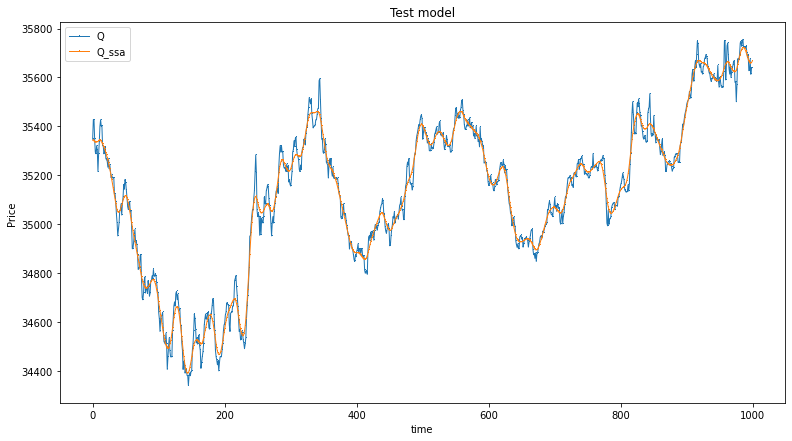

<Figure size 432x288 with 0 Axes>

In [21]:
q_ssa = pd.read_csv('./data/modified_data1.csv')
m, n = 0,1000
plt.subplots(1, figsize=(13, 7))
plt.plot(q_ssa['Q'][m:n],marker=',', linewidth='1', label="Q" )
plt.plot(q_ssa['Q_ssa'][m:n],marker=',', linewidth='1', label="Q_ssa" )
plt.plot(q_ssa['H'][m:n],marker=',', linewidth='1', label="H" )
plt.plot(q_ssa['H_ssa'][m:n],marker=',', linewidth='1', label="H_ssa" )


plt.xlabel('time')
plt.ylabel('Price')
plt.title('Test model')
plt.legend()
plt.show()
plt.savefig('./data/test')

In [22]:
root = pd.read_csv('./data/root.csv')
print(root.shape)

(5000, 6)


In [31]:
my_ohlc_data = np.array(root)
my_ohlc_data[0,4]


35347.39

In [42]:
q_s = np.array(q_ssa)

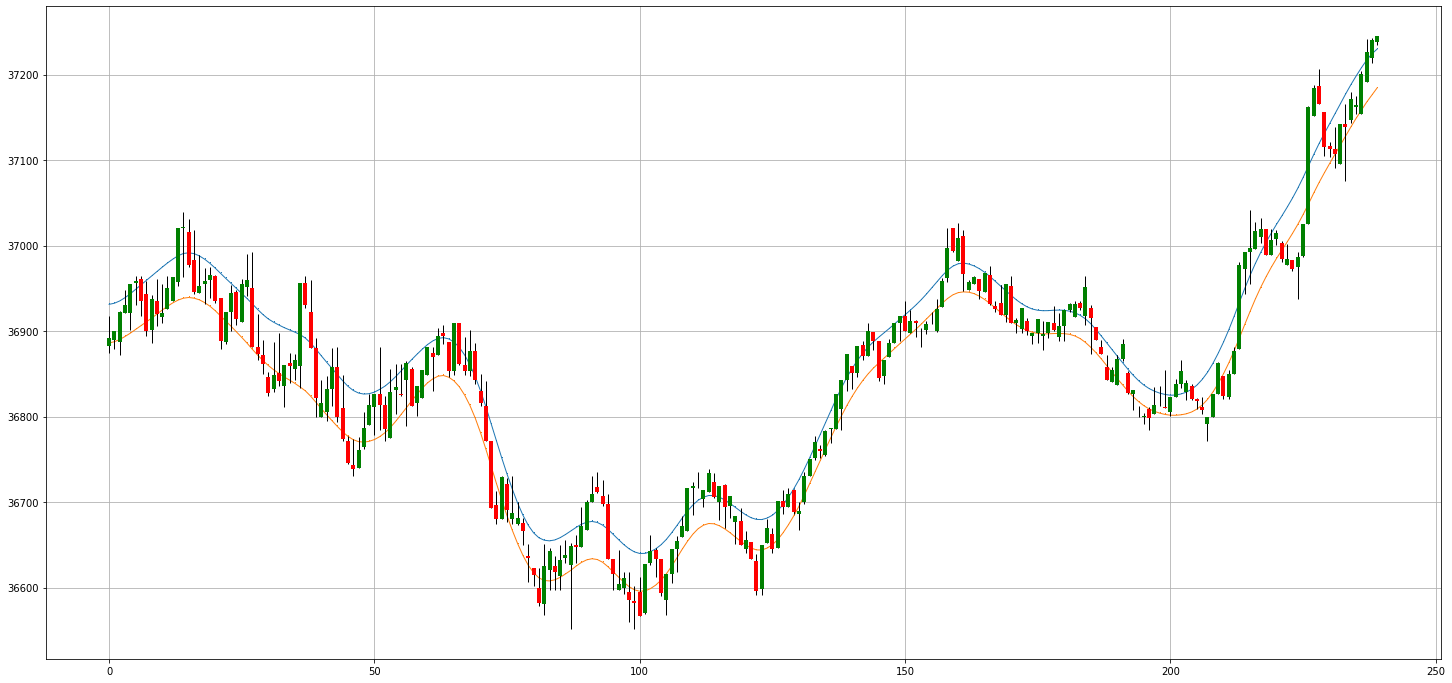

In [46]:
def ohlc_plot(Data, window, name):
    plt.subplots(1, figsize=(25, 12))
    Chosen = Data[-window:, ]
    plt.plot(q_s[-window:, 2],marker=',', linewidth='1', label="Q_ssa" )
    plt.plot(q_s[-window:, 3],marker=',', linewidth='1', label="H_ssa" )
    for i in range(len(Chosen)):
 
        plt.vlines(x = i, ymin = Chosen[i, 3], ymax = Chosen[i, 2], color = 'black', linewidth = 1)
        
        if Chosen[i, 4] > Chosen[i, 1]:
            color_chosen = 'green'
            plt.vlines(x = i, ymin = Chosen[i, 1], ymax = Chosen[i, 4], color = color_chosen, linewidth = 4)
        if Chosen[i, 4] < Chosen[i, 1]:
            color_chosen = 'red'
            plt.vlines(x = i, ymin = Chosen[i, 4], ymax = Chosen[i, 1], color = color_chosen, linewidth = 4)  
                    
        if Chosen[i, 4] == Chosen[i, 1]:
            color_chosen = 'black'
            plt.vlines(x = i, ymin = Chosen[i, 4], ymax = Chosen[i, 1], color = color_chosen, linewidth = 4)  
          
    plt.grid()
    plt.title(name)
ohlc_plot(my_ohlc_data, 240, '')

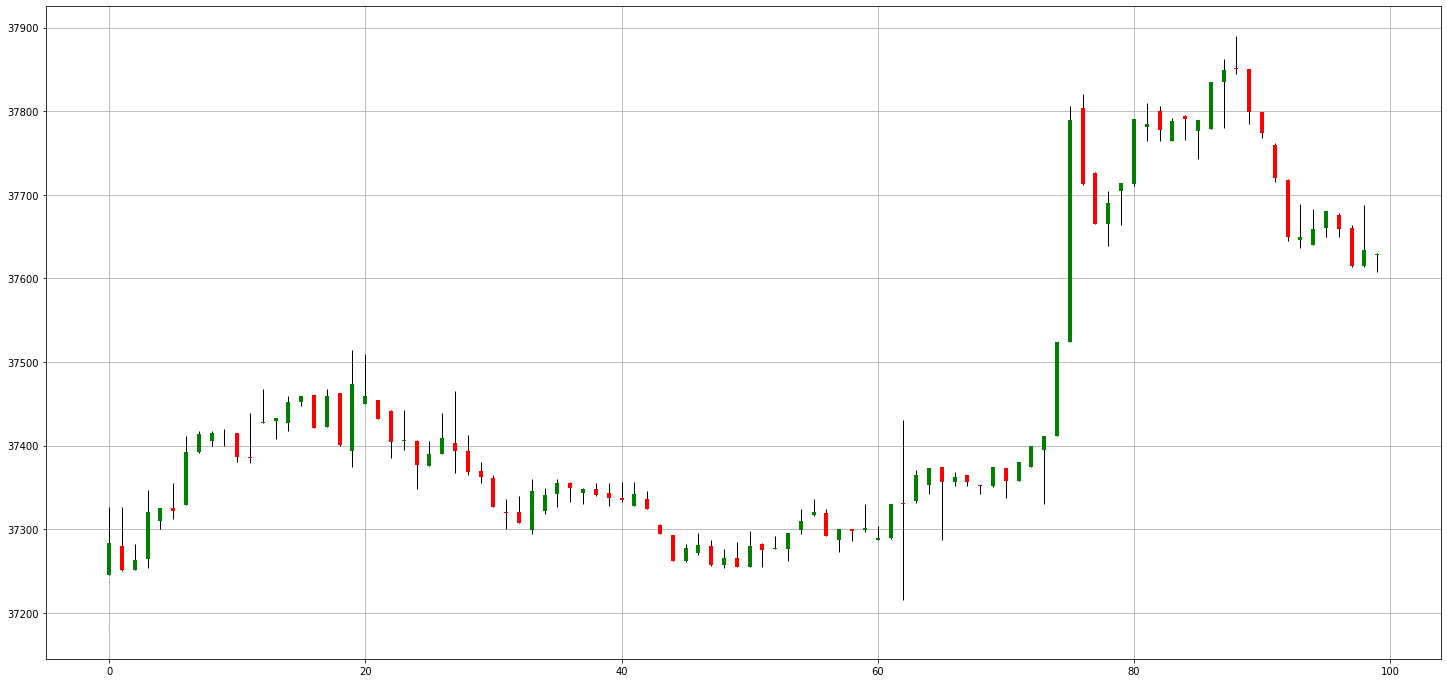

In [8]:
dt_ = np.array(dt)
def plot_(Data, window, name):
    plt.subplots(1, figsize=(25, 12))
    Chosen = Data[:window, ]
    plt.plot(Q_,marker=',', linewidth='1', label="Q_" )
    plt.plot(H_,marker=',', linewidth='1', label="H_" )
    for i in range(len(Chosen)):
 
        plt.vlines(x = i, ymin = Chosen[i, 3], ymax = Chosen[i, 2], color = 'black', linewidth = 1)
        
        if Chosen[i, 4] > Chosen[i, 1]:
            color_chosen = 'green'
            plt.vlines(x = i, ymin = Chosen[i, 1], ymax = Chosen[i, 4], color = color_chosen, linewidth = 4)
        if Chosen[i, 4] < Chosen[i, 1]:
            color_chosen = 'red'
            plt.vlines(x = i, ymin = Chosen[i, 4], ymax = Chosen[i, 1], color = color_chosen, linewidth = 4)  
                    
        if Chosen[i, 4] == Chosen[i, 1]:
            color_chosen = 'black'
            plt.vlines(x = i, ymin = Chosen[i, 4], ymax = Chosen[i, 1], color = color_chosen, linewidth = 4)  
          
    plt.grid()
    plt.title(name)
plot_(dt_, 100, '')